# Implementation of ANN in Keras

#### Assignment
1. Install and load the latest versions of TensorFlow and Keras. Print their versions.
2. Load the Wine Quality dataset and explore its dimensions.
3. Check for null values, identify categorical variables, and encode them.
4. Separate the features and target variables from the dataset.
5. Perform a train-test split, dividing the data into training, validation, and test datasets.
6. Scale the dataset using an appropriate scaling technique.
7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.
8. Create a Sequential model in Keras and add the previously designed layers to it.
9. Print the summary of the model architecture.
10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.
11. Compile the model with the specified loss function, optimizer, and metrics.
12. Fit the model to the training data using appropriate batch size and number of epochs.
13. Obtain the model's parameters (weights and biases).
14. Store the model's training history as a Pandas DataFrame.
15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.
16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [1]:
#1. loading the latest versions of TensorFlow and Keras and printing their versions.
import tensorflow as tf
import keras
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.13.0
Keras version: 2.13.1


Dimensions of Datasets: (1599, 12)
----------------------------------------------------------------------------------------------------
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0   

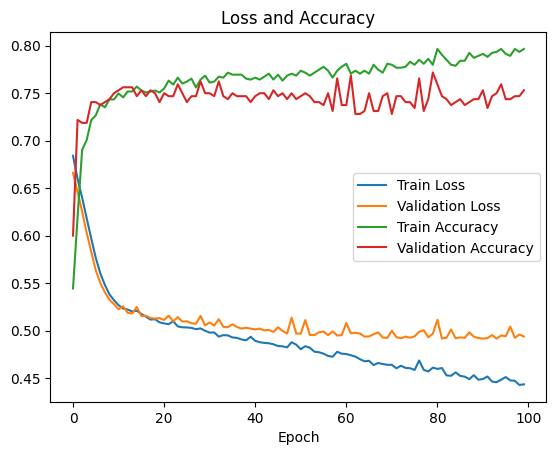

----------------------------------------------------------------------------------------------------
10/10 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7344
Test Loss: 0.5036 and Test Accuracy: 0.7344


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as pt

#2. Loading the Wine Quality dataset and exploring its dimensions
fp = "D:\Python Coding\PWassignment\wine.csv"
ds = pd.read_csv(fp)
print(f"Dimensions of Datasets: {ds.shape}")
print('-' * 100)
print(ds.head())
print('-' * 100)

#3. Checking for null values & Identifying categorical variables, and encodeing them.
print(ds.isnull().sum())
print('-' * 100)
cat_col = ds.select_dtypes(include=['object','category']).columns
print('Categorical Variables are :',cat_col)
print('-' * 100)
ds = pd.get_dummies(ds, columns=cat_col, drop_first='True')
print(ds.head())
print('-' * 100)

#4. Separating the features and target variables from the dataframe.
x = ds.drop(columns=['quality_good'])
y = ds['quality_good']
print("Dimensions after spliting the datasets:","X:", x.shape, "y:", y.shape)
print('-' * 100)

#5. Performing a train-test split and then dividing it into training, validation, and test datasets.
X_train, X_Test, y_train, y_Test = train_test_split(x,y, test_size=0.4, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_Test,y_Test, test_size=0.5, random_state=47)
print("Dimensions after spliting the datasets:",
      "\nTraining set - X:", X_train.shape, "y:", y_train.shape,
      "\nValidation set - X:", X_val.shape, "y:", y_val.shape,
      "\nTest set - X:", X_test.shape, "y:", y_test.shape)
print('-' * 100)

#6. Scaling the dataset using an appropriate scaling technique.
mms = MinMaxScaler()
x_train = mms.fit_transform(X_train)
x_val = mms.transform(X_val)
x_test = mms.transform(X_test)

#7. Designing and implementing two hidden layers and an output layer for the binary categorical variables.
hl1 = layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1],))
hl2 = layers.Dense(units=32, activation='relu')
opl = layers.Dense(units=1, activation='sigmoid')

#8. Creating a Sequential model in Keras and adding the previously designed layers to it.
model = Sequential([hl1, hl2, opl])

#9. Printing the summary of the model architecture.
print(model.summary())
print('-' * 100)

#10. Setting the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.
#11. Compiling the model with the specified loss function, optimizer, and metrics.
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

#12. Fitting the model to the training data using appropriate batch size and number of epochs.
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_val,y_val))

#13. Obtaing the model's parameters (weights and biases).
param = model.get_weights()
for i, l in enumerate(param):
    print(f"Layer {i} - Shape: {l.shape}")
print('-' * 100)
    
#14. Store the model's training history as a Pandas DataFrame.
history_df = pd.DataFrame(history.history)
print(history_df.head())
print('-' * 100)

#15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.
pt.plot(history.history['loss'])
pt.plot(history.history['val_loss'])
pt.plot(history.history['accuracy'])
pt.plot(history.history['val_accuracy'])
pt.title('Loss and Accuracy')
pt.xlabel('Epoch')
pt.legend(['Train Loss', 'Validation Loss', 'Train Accuracy', 'Validation Accuracy'])
pt.show()
print('-' * 100)

#16. Evaluate the model's performance using the test dataset and report relevant metrics.
tloss, tacc = model.evaluate(x_test, y_test)
print(f"Test Loss: {tloss:.4f} and Test Accuracy: {tacc:.4f}")